Basic usage of satplot tool in either python environment or ipython (not tested in jupyter yet)
  1. Manually fetch tle of satellite in question
	- save as file in data/TLEs
	- ensure only single TLE in file
  2. Create timespan over which to visualise the orbit
  3. Create orbit from TLE
  4. Create supplemental orbits (OPTIONAL)
  5. Create, populate and display visualiser

first set the environment variable in the terminal you are going to run the tool
```
export QTWEBENGINE_CHROMIUM_FLAGS='--no-sandbox'
```

In [ ]:
import satplot.model.timespan as timespan
import satplot.model.orbit as orbit

import datetime as dt

t = timespan.TimeSpan(dt.datetime(2024,2,6,17,0,0), timestep = '30S', timeperiod='40M')
o = orbit.Orbit.fromTLE(t,'data/TLEs/spirit_latest.tle')
print(f"Period: {t.start}->{t.end}")
print(f"Duration: {t.time_period}")
print(f"Number Steps: {len(t)}")
print(f"Number of steps in single orbit: {o.period_steps}")
print(f"Length of timestep: {t.time_step}")

In [ ]:
ir_os = orbit.Orbit.multiFromTLE(t,'data/TLEs/iridiumNEXT_latest.tle')

In [ ]:
import satplot.visualiser.orbit as orbitvis

ovis = orbitvis.OrbitVisualiser()
ovis.setSource(o)
ovis.addEarth()
ovis.addUmbra()
ovis.add3DLandMass()
ovis.curr_index = int(len(t)/2)
ovis.addOrbit()
for iro in ir_os:
	ovis.attachSupplementalOrbit(iro)
ovis.addSupplementalOrbits()
ovis.openWindow()
ovis.updateWindow()

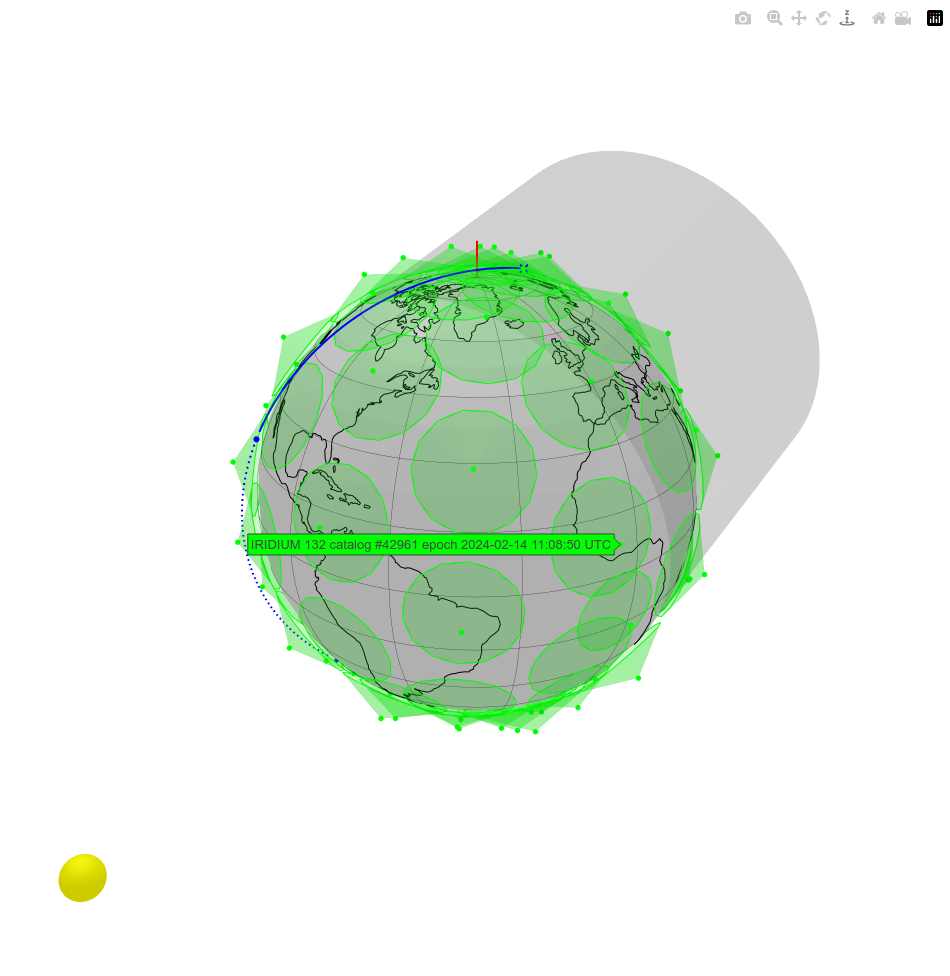

The position of the primary orbit in the timespan can be changed using the ovis.curr_index attribute

In [ ]:
ovis.curr_index = int(3*len(t)/4)
ovis.updateWindow()

Options for colour and style of each element are hardcoded in the class at this stage, but can be directly modified in the `_setDefaultOptions()` function